In [2]:
# import libraires are crucial part to analyse, visualize data with python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lasio

In [3]:
las = lasio.read('Pluto-3ST1.LAS')

## Practical 1

In [4]:
las.curves

[CurveItem(mnemonic="DEPT", unit="M", value="", descr="DEPTH", original_mnemonic="DEPT", data.shape=(115041,)),
 CurveItem(mnemonic="C1", unit="IN", value="", descr="Caliper", original_mnemonic="C1", data.shape=(115041,)),
 CurveItem(mnemonic="C2", unit="IN", value="", descr="Caliper", original_mnemonic="C2", data.shape=(115041,)),
 CurveItem(mnemonic="DTCO3", unit="µS/FT", value="", descr="Acoustic Slowness, log", original_mnemonic="DTCO3", data.shape=(115041,)),
 CurveItem(mnemonic="DTSH5", unit="µS/FT", value="", descr="Shear Slowness, log", original_mnemonic="DTSH5", data.shape=(115041,)),
 CurveItem(mnemonic="GR", unit="GAPI", value="", descr="Gamma Ray", original_mnemonic="GR", data.shape=(115041,)),
 CurveItem(mnemonic="NPHI", unit="1", value="", descr="Porosity, Neutron", original_mnemonic="NPHI", data.shape=(115041,)),
 CurveItem(mnemonic="RHO8", unit="G/CM3", value="", descr="Density", original_mnemonic="RHO8", data.shape=(115041,)),
 CurveItem(mnemonic="RLA1", unit="OHM.M", 

In [5]:
# convert to a pandas dataframe as it makes exploratory data analysis easier
data1 = las.df()

In [6]:
# display few rows of data
print(data1)

           C1  C2  DTCO3  DTSH5  GR    NPHI  RHO8    RLA1    RLA4    RXO8  \
DEPT                                                                        
607.1000  NaN NaN    NaN    NaN NaN     NaN   NaN     NaN     NaN     NaN   
607.1254  NaN NaN    NaN    NaN NaN     NaN   NaN     NaN     NaN     NaN   
607.1508  NaN NaN    NaN    NaN NaN     NaN   NaN     NaN     NaN     NaN   
607.1762  NaN NaN    NaN    NaN NaN     NaN   NaN     NaN     NaN     NaN   
607.2016  NaN NaN    NaN    NaN NaN     NaN   NaN     NaN     NaN     NaN   
...        ..  ..    ...    ...  ..     ...   ...     ...     ...     ...   
3529.0144 NaN NaN    NaN    NaN NaN  0.4029   NaN  3.9328  7.1789  0.1248   
3529.0398 NaN NaN    NaN    NaN NaN  0.4029   NaN  3.9328  7.1789  0.1251   
3529.0652 NaN NaN    NaN    NaN NaN  0.4029   NaN  3.9328  7.1789  0.1254   
3529.0906 NaN NaN    NaN    NaN NaN  0.4029   NaN  3.9328  7.1789  0.1257   
3529.1160 NaN NaN    NaN    NaN NaN  0.4029   NaN  3.9328  7.1789  0.1260   

In [7]:
data1.columns

Index(['C1', 'C2', 'DTCO3', 'DTSH5', 'GR', 'NPHI', 'RHO8', 'RLA1', 'RLA4',
       'RXO8', 'SGRC'],
      dtype='object')

In [8]:
# We need to reset index to make depth as column
data2= data1.reset_index()
# rename any of the header definination -  standard header name is helpful for interpretation.
data2 = data2.rename(columns=({'DEPT':'DEPTH','C1':'CALI','RLA1':'RES'}))
data2.describe()

,DEPTH,CALI,C2,DTCO3,DTSH5,GR,NPHI,RHO8,RES,RLA4,RXO8,SGRC
count,115041.000000,51894.000000,51894.000000,51894.000000,50982.000000,51894.000000,51894.000000,51093.000000,51894.000000,51147.000000,51894.000000,114890.000000
mean,2068.108000,8.816269,8.660922,101.409713,204.289670,83.986070,0.295400,2.348974,245.092160,5.276907,2.013662,60.074836
std,843.524361,0.418782,0.414393,14.510944,52.054015,39.659210,0.073169,0.142785,4375.554768,62.155203,7.960574,42.372902
min,607.100000,4.176300,4.251200,50.093800,-221.282500,27.855000,0.005100,1.299800,0.001400,0.430800,0.030000,10.822500
25%,1337.604000,8.565600,8.384100,89.994375,165.490000,53.568150,0.245000,2.269200,0.974400,1.051300,0.764725,32.831875
50%,2068.108000,8.912400,8.780000,98.578900,186.754600,70.287400,0.292200,2.345200,1.261500,1.364200,1.253100,47.446400
75%,2798.612000,9.042600,8.854300,114.028425,246.222150,111.206325,0.346100,2.433500,2.078750,2.255500,1.816875,69.071450
max,3529.116000,13.225700,12.781300,141.073900,374.961000,284.339200,0.666400,3.608800,100000.000000,3168.231300,361.151200,450.354800


In [9]:
ip_log = data2.replace(-999.00000, np.nan)


In [10]:
for m in ip_log.columns:
    print(m, ip_log[m].isnull().values.any())
print(ip_log.isnull().sum())

DEPTH False
CALI True
C2 True
DTCO3 True
DTSH5 True
GR True
NPHI True
RHO8 True
RES True
RLA4 True
RXO8 True
SGRC True
DEPTH        0
CALI     63147
C2       63147
DTCO3    63147
DTSH5    64059
GR       63147
NPHI     63147
RHO8     63948
RES      63147
RLA4     63894
RXO8     63147
SGRC       151
dtype: int64


In [11]:
ip_log.head(5)

,DEPTH,CALI,C2,DTCO3,DTSH5,GR,NPHI,RHO8,RES,RLA4,RXO8,SGRC
0,607.1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.6059
1,607.1254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.6867
2,607.1508,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.7675
3,607.1762,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.8483
4,607.2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.0216


In [12]:
ip_log = ip_log.iloc[:,:]

In [13]:
# replace nan values by mean value of the log measurment
ip_log['DEPTH'].fillna(ip_log['DEPTH'].mean(),inplace=True)
ip_log['CALI'].fillna(ip_log['CALI'].mean(), inplace=True)
ip_log['C2'].fillna(ip_log['C2'].mean(), inplace=True)
ip_log['DTCO3'].fillna(ip_log['DTCO3'].mean(), inplace=True)
ip_log['DTSH5'].fillna(ip_log['DTSH5'].mean(), inplace=True)
ip_log['GR'].fillna(ip_log['GR'].mean(), inplace=True)
ip_log['NPHI'].fillna(ip_log['NPHI'].mean(), inplace=True)
ip_log['RHO8'].fillna(ip_log['RHO8'].mean(), inplace=True)
ip_log['RES'].fillna(ip_log['RES'].mean(), inplace=True)
ip_log['RLA4'].fillna(ip_log['RLA4'].mean(), inplace=True)
ip_log['RXO8'].fillna(ip_log['RXO8'].mean(), inplace=True)
# ip_log['SRGC'].fillna(ip_log['SRGC'].mean(), inplace=True)


In [14]:
ip_log.head(5)

,DEPTH,CALI,C2,DTCO3,DTSH5,GR,NPHI,RHO8,RES,RLA4,RXO8,SGRC
0,607.1000,8.816269,8.660922,101.409713,204.28967,83.98607,0.2954,2.348974,245.09216,5.276907,2.013662,16.6059
1,607.1254,8.816269,8.660922,101.409713,204.28967,83.98607,0.2954,2.348974,245.09216,5.276907,2.013662,15.6867
2,607.1508,8.816269,8.660922,101.409713,204.28967,83.98607,0.2954,2.348974,245.09216,5.276907,2.013662,14.7675
3,607.1762,8.816269,8.660922,101.409713,204.28967,83.98607,0.2954,2.348974,245.09216,5.276907,2.013662,13.8483
4,607.2016,8.816269,8.660922,101.409713,204.28967,83.98607,0.2954,2.348974,245.09216,5.276907,2.013662,13.0216


In [16]:
tops = ('Torok','Pebble SH','Walakpa SS', 'J-Klingak','Barrow SS','Klingak SH','T-Sag River SS', 'Shublik','Basement')
tops_depths=(100,1701,2071,2087,2990, 3102,3224,3258,3633)

In [39]:
import matplotlib.pyplot as plt

def triple_combo_log(top_depth, bottom_depth):

    logs = ip_log[(ip_log.DEPTH >= top_depth) & (ip_log.DEPTH <= bottom_depth)]

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 12), sharey=True)
    fig.subplots_adjust(top=0.75, wspace=0.1)

    for axes in ax:
        axes.set_ylim(top_depth, bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)

    # First track GR, CALI, SP logs to display
    ax2 = ax[0].twiny()
    ax2.set_xlim(0, 16)
    ax2.spines['top'].set_position(('outward', 40))
    ax2.plot(logs.CALI, logs.DEPTH, '--k', label="CALI (in)", color='black')  # Change CALI color to blue
    ax2.set_xlabel('CALI(in)')
    ax2.tick_params(axis='x')

    ax3 = ax[0].twiny()
    ax3.set_xlim(0, 250)
    ax3.spines['top'].set_position(('outward', 80))
    ax3.plot(logs.GR, logs.DEPTH, '-g', label="GR (API)", color='pink')  # Change GR color to orange
    ax3.set_xlabel('GR(API)')
    ax3.tick_params(axis='x')

    # Second track resistivity plot
    ax12 = ax[1].twiny()
    ax12.set_xlim(0.1, 1000)
    ax12.set_xscale('log')
    ax12.spines['top'].set_position(('outward', 40))
    ax12.plot(logs.RES, logs.DEPTH, '-m', label="RESD (m.ohm)", color='blue')  # Change RESD color to green
    ax12.set_xlabel('RESD(m.ohm)')
    ax12.tick_params(axis='x')

    ax13 = ax[1].twiny()
    ax13.set_xlim(0.1, 1000)
    ax13.set_xscale('log')
    ax13.spines['top'].set_position(('outward', 0))
    ax13.plot(logs.RXO8, logs.DEPTH, '-k', label="shalllow RES (m.ohm)", color='purple')  # Change RESS color to purple
    ax13.set_xlabel('shallow res (m.ohm)', color='purple')
    ax13.tick_params(axis='x', colors='purple')


    # Third track NPHI, RHO, DT display
    ax22 = ax[2].twiny()
    ax22.set_xlim(0, 0.6)
    ax22.invert_xaxis()
    ax22.spines['top'].set_position(('outward', 40))
    ax22.plot(logs.NPHI, logs.DEPTH, '--k', label="NPHI (%)", color='brown')  # Change NPHI color to red
    ax22.set_xlabel('NPHI(%)')
    ax22.tick_params(axis='x')

    ax23 = ax[2].twiny()
    ax23.set_xlim(1.5, 2.95)
    ax23.spines['top'].set_position(('outward', 80))
    ax23.plot(logs.RXO8, logs.DEPTH, '-r', label="RHOB (g/cc)", color='purple')  # Change RHOB color to purple
    ax23.set_xlabel('RHOM(g/cc)')
    ax23.tick_params(axis='x')

    plt.grid()
    plt.show()




/tmp/ipykernel_26528/3242894767.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(logs.CALI, logs.DEPTH, '--k', label="CALI (in)", color='black')  # Change CALI color to blue
/tmp/ipykernel_26528/3242894767.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  ax3.plot(logs.GR, logs.DEPTH, '-g', label="GR (API)", color='pink')  # Change GR color to orange
/tmp/ipykernel_26528/3242894767.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-m" (-> color='m'). The keyword argument will take precedence.
  ax12.plot(logs.RES, logs.DEPTH, '-m', label="RESD (m.ohm)", color='blue')  # Change RESD color to green
/tmp/ipykernel_26528/3242894767.py:44: UserWarning: color is redundantly defined by the 'color' keywor

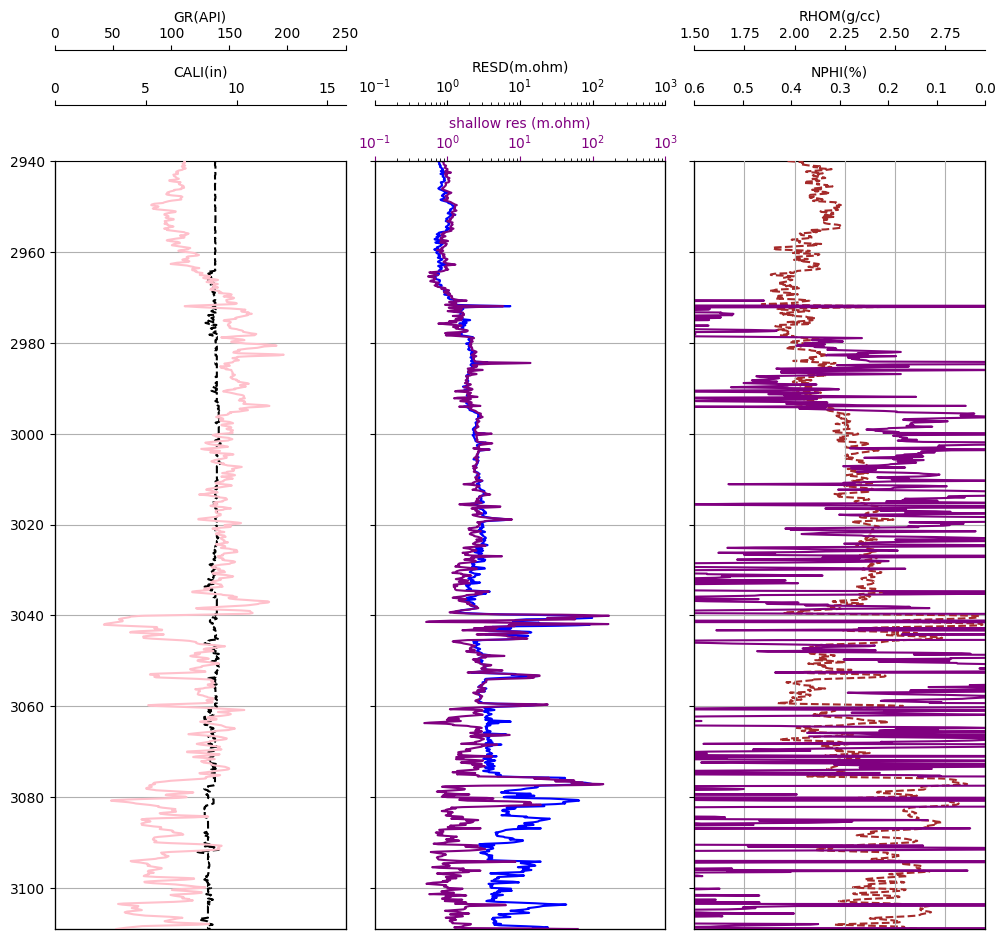

In [40]:
top_depth = 2940
bottom_depth=3109
triple_combo_log(top_depth, bottom_depth)

/tmp/ipykernel_26528/3242894767.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--k" (-> color='k'). The keyword argument will take precedence.
  ax2.plot(logs.CALI, logs.DEPTH, '--k', label="CALI (in)", color='black')  # Change CALI color to blue
/tmp/ipykernel_26528/3242894767.py:27: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-g" (-> color='g'). The keyword argument will take precedence.
  ax3.plot(logs.GR, logs.DEPTH, '-g', label="GR (API)", color='pink')  # Change GR color to orange
/tmp/ipykernel_26528/3242894767.py:36: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-m" (-> color='m'). The keyword argument will take precedence.
  ax12.plot(logs.RES, logs.DEPTH, '-m', label="RESD (m.ohm)", color='blue')  # Change RESD color to green
/tmp/ipykernel_26528/3242894767.py:44: UserWarning: color is redundantly defined by the 'color' keywor

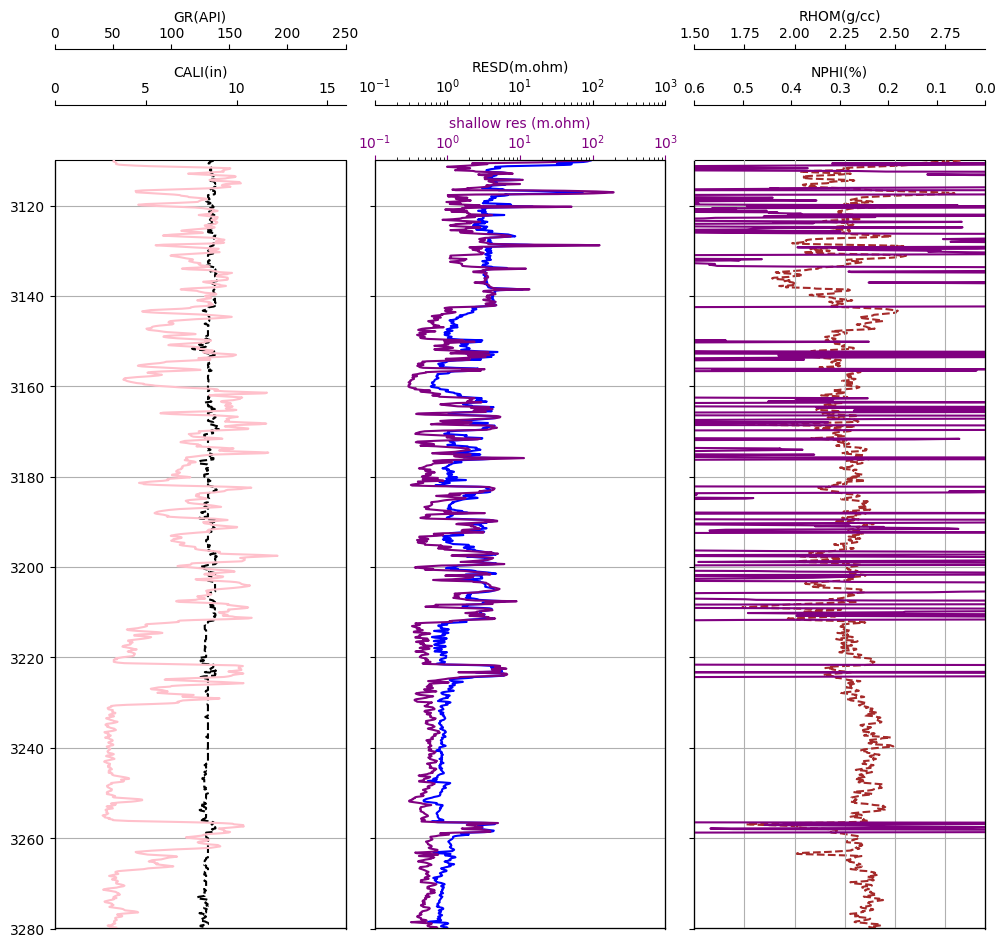

In [41]:
top_depth = 3110
bottom_depth=3280
triple_combo_log(top_depth, bottom_depth)

## PRACTICAL 2

In [ ]:
def triple_combo_log(top_depth, bottom_depth):

    logs = ip_log[(ip_log.DEPTH >= top_depth) & (ip_log.DEPTH <= bottom_depth)]

    fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 12), sharey=True)
    fig.suptitle("Triple-combo Log display", fontsize=24,color='green')
    fig.subplots_adjust(top=0.75, wspace=0.1)

    for axes in ax:
        axes.set_ylim(top_depth, bottom_depth)
        axes.invert_yaxis()
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False)

    # First track GR, CALI, SP logs to display
    ax2 = ax[0].twiny()
    ax2.set_xlim(0, 16)
    ax2.spines['top'].set_position(('outward', 40))
    ax2.plot(logs.CALI, logs.DEPTH, '--k', label="CALI (in)", color='orange')  # Change CALI color to orange
    ax2.set_xlabel('CALI(in)', color='orange')
    ax2.tick_params(axis='x', colors='orange')

    ax3 = ax[0].twiny()
    ax3.set_xlim(0, 250)
    ax3.spines['top'].set_position(('outward', 80))
    ax3.plot(logs.GR, logs.DEPTH, '-g', label="GR (API)", color='blue')  # Change GR color to blue
    ax3.set_xlabel('GR(API)', color='blue')
    ax3.tick_params(axis='x', colors='blue')

    # Second track resistivity plot
    ax12 = ax[1].twiny()
    ax12.set_xlim(0.1, 1000)
    ax12.set_xscale('log')
    ax12.spines['top'].set_position(('outward', 40))
    ax12.plot(logs.RES, logs.DEPTH, '-m', label="RESD (m.ohm)", color='green')  # Change RESD color to green
    ax12.set_xlabel('RESD(m.ohm)', color='green')
    ax12.tick_params(axis='x', colors='green')

    # ax13 = ax[1].twiny()
    # ax13.set_xlim(1, 10000)
    # ax13.set_xscale('log')
    # ax13.spines['top'].set_position(('outward', 0))
    # ax13.plot(logs.shal_res, logs.depth, '-k', label="RESS (m.ohm)", color='purple')  # Change RESS color to purple
    # ax13.set_xlabel('RESS(m.ohm)', color='purple')
    # ax13.tick_params(axis='x', colors='purple')

    # Third track NPHI, RHO, DT display
    ax33 = ax[2].twiny()
    ax33.set_xlim(0, 0.6)
    ax33.invert_xaxis()
    ax33.spines['top'].set_position(('outward', 40))
    ax33.plot(logs.NPHI, logs.DEPTH, '--k', label="NPHI (%)", color='red')  # Change NPHI color to red
    ax33.set_xlabel('NPHI(%)', color='red')
    ax33.tick_params(axis='x', colors='red')

    ax34 = ax[2].twiny()
    ax34.set_xlim(1.5, 2.95)
    ax34.spines['top'].set_position(('outward', 80))
    ax34.plot(logs.RHO8, logs.DEPTH, '-r', label="RHOB (g/cc)", color='brown')  # Change RHOB color to brown
    ax34.set_xlabel('RHOM(g/cc)', color='brown')
    ax34.tick_params(axis='x', colors='brown')


    #fourth track
    ax33 = ax[2].twiny()
    ax33.set_xlim(0, 0.6)
    ax33.invert_xaxis()
    ax33.spines['top'].set_position(('outward', 40))
    ax33.plot(logs.NPHI, logs.DEPTH, '--k', label="NPHI (%)", color='red')  # Change NPHI color to red
    ax33.set_xlabel('NPHI(%)', color='red')
    ax33.tick_params(axis='x', colors='red')

    ax34 = ax[2].twiny()
    ax34.set_xlim(1.5, 2.95)
    ax34.spines['top'].set_position(('outward', 80))
    ax34.plot(logs.RHO8, logs.DEPTH, '-r', label="RHOB (g/cc)", color='brown')  # Change RHOB color to brown
    ax34.set_xlabel('RHOM(g/cc)', color='brown')
    ax34.tick_params(axis='x', colors='brown')
    plt.grid()
    plt.show()